In [33]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
# import bqplot as bq
# import geopandas as gpd
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import networkx as nx

In [34]:
df = pd.read_csv('kremer_project.csv')

In [35]:
df

,images,cluster,cks,bid,part_id,place,year,flag,part_type,year_interval,place_category
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00061,CK_Introduction to Geometry,1622,329.0,Venice,1494,NaN,adaption_100,1490-1509,Large Center
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01218,CK_09 Spheres,1622,329.0,Venice,1494,NaN,adaption_100,1490-1509,Large Center
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01218,CK_T-O Maps,1622,329.0,Venice,1494,NaN,adaption_100,1490-1509,Large Center
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01467,CK_Geometry for Geometry,1622,329.0,Venice,1494,NaN,adaption_100,1490-1509,Large Center
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00326,CK_Sphericity of the Water Element,1622,329.0,Venice,1494,NaN,adaption_100,1490-1509,Large Center
...,...,...,...,...,...,...,...,...,...,...,...
27976,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01616,CK_Apparent Size of Stars,2281,940.0,Antwerp,1582,NaN,adaption_100,1570-1589,Medium Center
27977,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01511,CK_Sphericity of the Water Element,2281,940.0,Antwerp,1582,NaN,adaption_100,1570-1589,Medium Center
27978,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01511,CK_Terraqueous Globe,2281,940.0,Antwerp,1582,NaN,adaption_100,1570-1589,Medium Center
27979,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01507,CK_Daily Rotation of the Firmament,2281,940.0,Antwerp,1582,NaN,adaption_100,1570-1589,Medium Center


In [36]:
books = pd.read_csv('/Users/nogashlomi/projects/Image_data/dissertation/full_book_data_feb_25.csv')

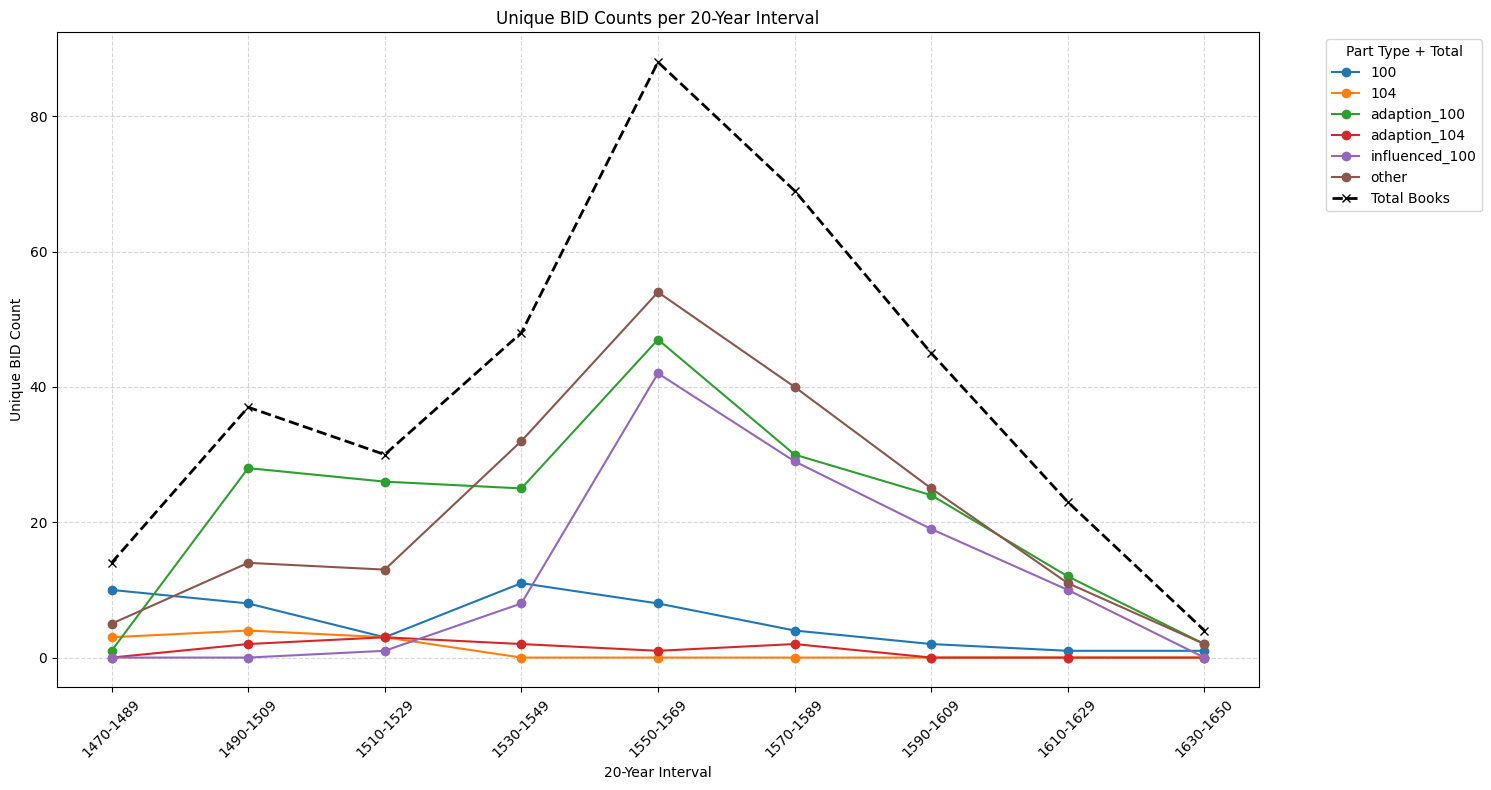

In [37]:
# Pivot: count unique bids per year_interval and part_type
pivot = (
    df.groupby(['year_interval', 'part_type'])['bid']
    .nunique()
    .unstack(fill_value=0)
)

# Total books per interval
book_counts = books.groupby('year_interval')['bid'].nunique()
book_counts = book_counts.reindex(pivot.index, fill_value=0)

# Plot
plt.figure(figsize=(15, 8))

# Plot each part_type
pivot.plot(ax=plt.gca(), marker='o')

# Plot total books as black dashed line
plt.plot(
    pivot.index,
    book_counts,
    color='black',
    linestyle='--',
    marker='x',
    linewidth=2,
    label='Total Books'
)

plt.title('Unique BID Counts per 20-Year Interval')
plt.xlabel('20-Year Interval')
plt.ylabel('Unique BID Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Part Type + Total', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("num_books_part_type_simple.png", dpi=300, bbox_inches='tight')
plt.show()


In [38]:
filtered_df = df[df['cluster'] == 'SAC_SIL_03669']
# filtered_df

In [39]:
# Print the columns and the number of unique values in each column
for col in filtered_df.columns:
    print(f"Column: {col} - Unique values: {filtered_df[col].nunique()}")


Column: images - Unique values: 32
Column: cluster - Unique values: 1
Column: cks - Unique values: 2
Column: bid - Unique values: 32
Column: part_id - Unique values: 10
Column: place - Unique values: 5
Column: year - Unique values: 28
Column: flag - Unique values: 0
Column: part_type - Unique values: 2
Column: year_interval - Unique values: 7
Column: place_category - Unique values: 2


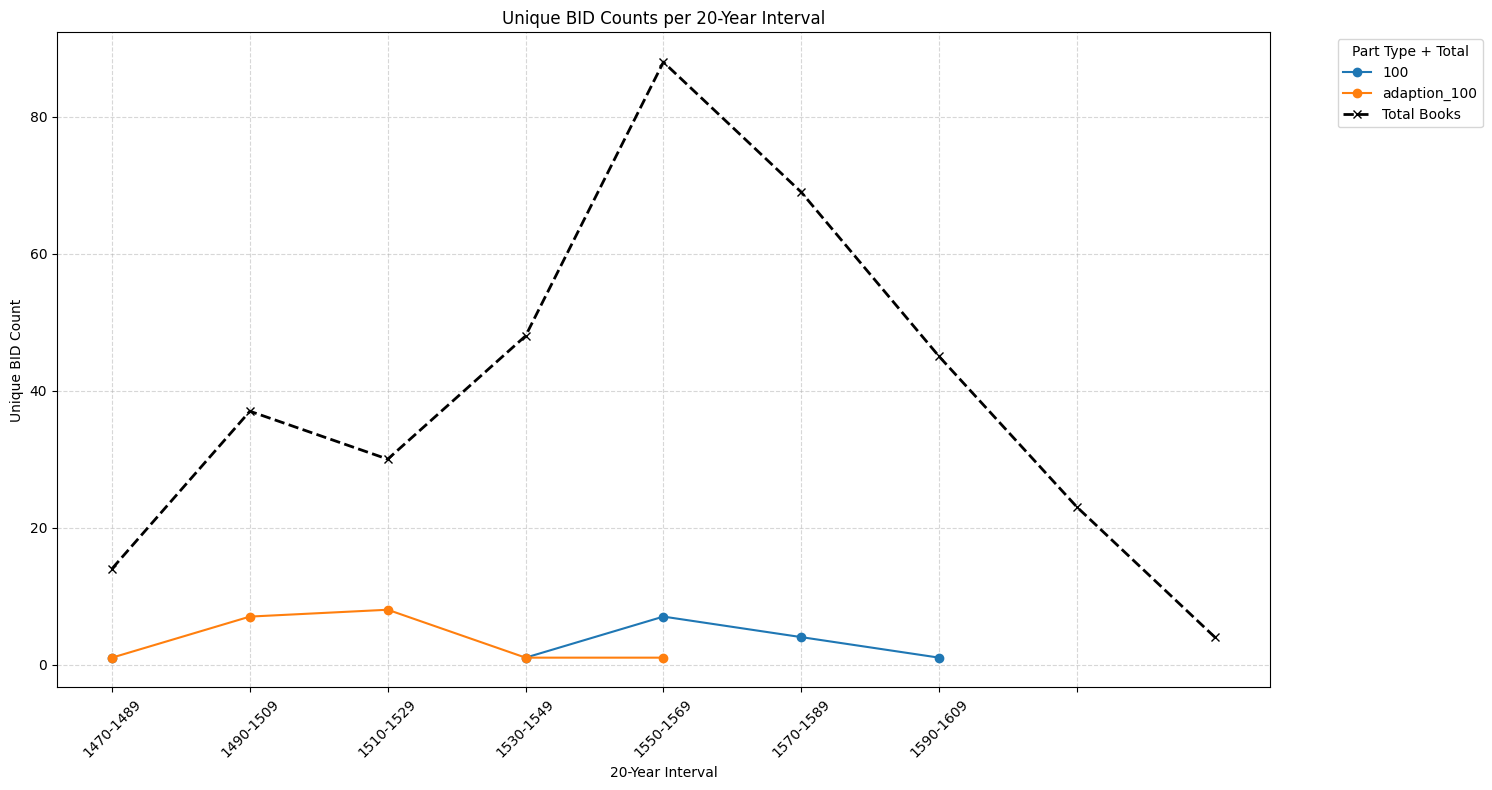

In [40]:
# Get all year intervals from the full df
all_intervals = sorted(df['year_interval'].unique())

# Create pivot with filtered_df
pivot = (
    filtered_df.groupby(['year_interval', 'part_type'])['bid']
    .nunique()
    .unstack(fill_value=0)
)

# Reindex to include all intervals (fill missing with 0)
pivot = pivot.reindex(all_intervals, fill_value=0)

# Total books per interval from full books df
book_counts = books.groupby('year_interval')['bid'].nunique()
book_counts = book_counts.reindex(all_intervals, fill_value=0)

# Masking zero values
pivot = pivot[pivot > 0].dropna(how='all')  # Remove all-zero rows
book_counts = book_counts[book_counts > 0]  # Remove zero values

# Plot
plt.figure(figsize=(15, 8))

# Plot each part_type
pivot.plot(ax=plt.gca(), marker='o')

# Plot total books as black dashed line
plt.plot(
    book_counts.index,
    book_counts,
    color='black',
    linestyle='--',
    marker='x',
    linewidth=2,
    label='Total Books'
)

plt.title('Unique BID Counts per 20-Year Interval')
plt.xlabel('20-Year Interval')
plt.ylabel('Unique BID Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Part Type + Total', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.savefig("num_books_part_type_simple_no_zeros.png", dpi=300, bbox_inches='tight')
plt.show()


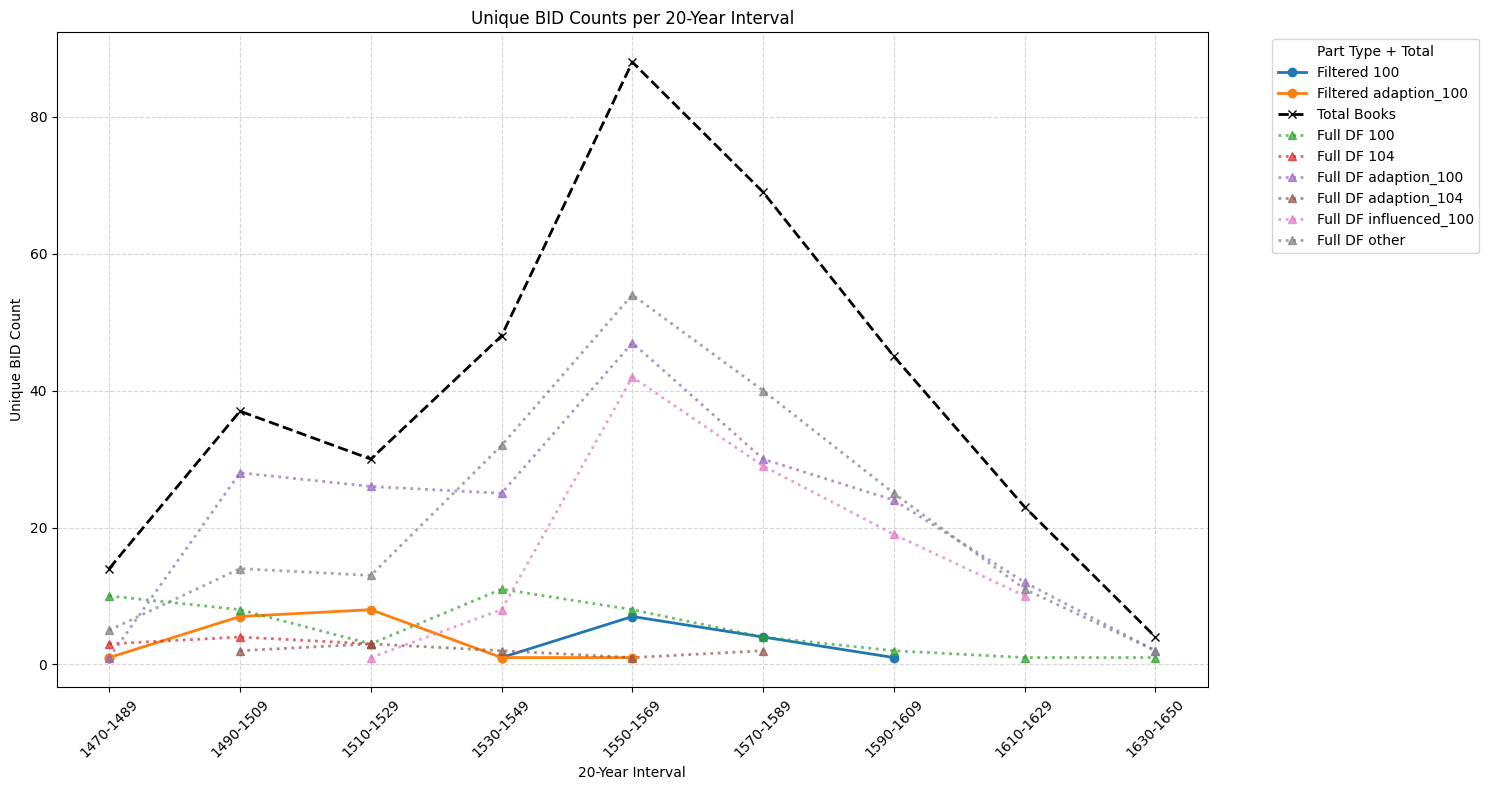

In [41]:
# Get all year intervals from the full df
all_intervals = sorted(df['year_interval'].unique())

# Create pivot with filtered_df for part types
pivot = (
    filtered_df.groupby(['year_interval', 'part_type'])['bid']
    .nunique()
    .unstack(fill_value=0)
)

# Reindex to include all intervals (fill missing with 0)
pivot = pivot.reindex(all_intervals, fill_value=0)

# Total books per interval from full books df
book_counts = books.groupby('year_interval')['bid'].nunique()
book_counts = book_counts.reindex(all_intervals, fill_value=0)

# Get unique bids per part_type from the full df (not filtered_df)
pivot_full_df = (
    df.groupby(['year_interval', 'part_type'])['bid']
    .nunique()
    .unstack(fill_value=0)
)

# Reindex full df pivot to include all intervals
pivot_full_df = pivot_full_df.reindex(all_intervals, fill_value=0)

# Masking zero values in filtered data
pivot = pivot[pivot > 0].dropna(how='all')  # Remove all-zero rows
book_counts = book_counts[book_counts > 0]  # Remove zero values

# Masking zero values in the full df part type data
pivot_full_df = pivot_full_df[pivot_full_df > 0].dropna(how='all')

# Plot
plt.figure(figsize=(15, 8))

# Plot each part_type from filtered_df manually with different colors
for part_type in pivot.columns:
    plt.plot(
        pivot.index,
        pivot[part_type],
        marker='o',
        label=f'Filtered {part_type}',
        linewidth=2
    )

# Plot total books as black dashed line
plt.plot(
    book_counts.index,
    book_counts,
    color='black',
    linestyle='--',
    marker='x',
    linewidth=2,
    label='Total Books'
)

# Plot part type counts from full df (reference) manually
for part_type in pivot_full_df.columns:
    plt.plot(
        pivot_full_df.index,
        pivot_full_df[part_type],
        linestyle=':',
        marker='^',
        label=f'Full DF {part_type}',
        linewidth=2,
        alpha=0.7
    )

# Title and labels
plt.title('Unique BID Counts per 20-Year Interval')
plt.xlabel('20-Year Interval')
plt.ylabel('Unique BID Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Part Type + Total', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and display the plot
plt.savefig("3669.png", dpi=300, bbox_inches='tight')
plt.show()


In [42]:
filtered_df = df[df['cluster'] == 'SAC_SIL_01504']
# filtered_df

In [43]:
# Print the columns and the number of unique values in each column
for col in filtered_df.columns:
    print(f"Column: {col} - Unique values: {filtered_df[col].nunique()}")


Column: images - Unique values: 129
Column: cluster - Unique values: 1
Column: cks - Unique values: 1
Column: bid - Unique values: 105
Column: part_id - Unique values: 30
Column: place - Unique values: 9
Column: year - Unique values: 60
Column: flag - Unique values: 0
Column: part_type - Unique values: 5
Column: year_interval - Unique values: 6
Column: place_category - Unique values: 4


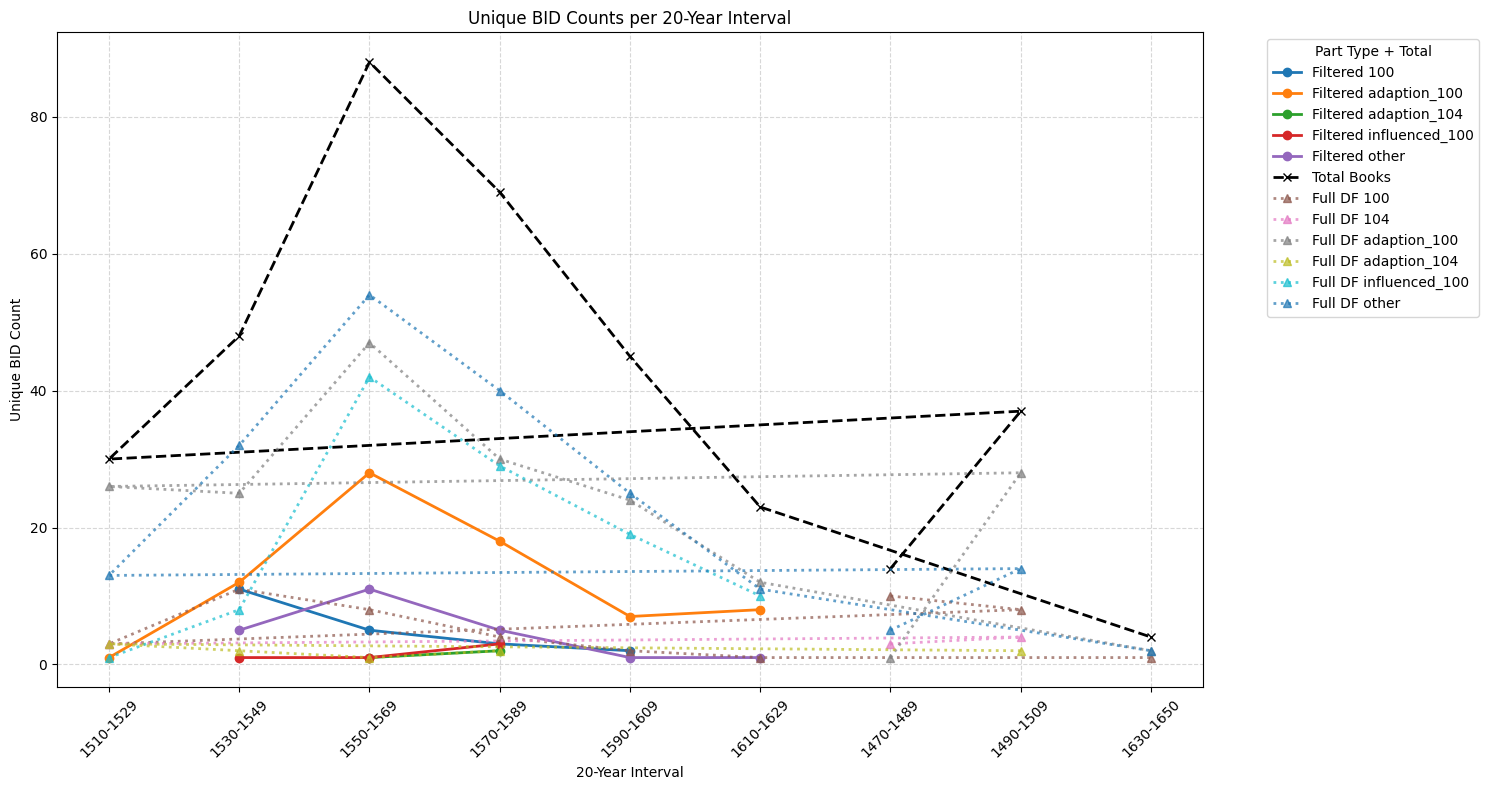

In [44]:
# Get all year intervals from the full df
all_intervals = sorted(df['year_interval'].unique())

# Create pivot with filtered_df for part types
pivot = (
    filtered_df.groupby(['year_interval', 'part_type'])['bid']
    .nunique()
    .unstack(fill_value=0)
)

# Reindex to include all intervals (fill missing with 0)
pivot = pivot.reindex(all_intervals, fill_value=0)

# Total books per interval from full books df
book_counts = books.groupby('year_interval')['bid'].nunique()
book_counts = book_counts.reindex(all_intervals, fill_value=0)

# Get unique bids per part_type from the full df (not filtered_df)
pivot_full_df = (
    df.groupby(['year_interval', 'part_type'])['bid']
    .nunique()
    .unstack(fill_value=0)
)

# Reindex full df pivot to include all intervals
pivot_full_df = pivot_full_df.reindex(all_intervals, fill_value=0)

# Masking zero values in filtered data
pivot = pivot[pivot > 0].dropna(how='all')  # Remove all-zero rows
book_counts = book_counts[book_counts > 0]  # Remove zero values

# Masking zero values in the full df part type data
pivot_full_df = pivot_full_df[pivot_full_df > 0].dropna(how='all')

# Plot
plt.figure(figsize=(15, 8))

# Plot each part_type from filtered_df manually with different colors
for part_type in pivot.columns:
    plt.plot(
        pivot.index,
        pivot[part_type],
        marker='o',
        label=f'Filtered {part_type}',
        linewidth=2
    )

# Plot total books as black dashed line
plt.plot(
    book_counts.index,
    book_counts,
    color='black',
    linestyle='--',
    marker='x',
    linewidth=2,
    label='Total Books'
)

# Plot part type counts from full df (reference) manually
for part_type in pivot_full_df.columns:
    plt.plot(
        pivot_full_df.index,
        pivot_full_df[part_type],
        linestyle=':',
        marker='^',
        label=f'Full DF {part_type}',
        linewidth=2,
        alpha=0.7
    )

# Title and labels
plt.title('Unique BID Counts per 20-Year Interval')
plt.xlabel('20-Year Interval')
plt.ylabel('Unique BID Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Part Type + Total', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and display the plot
plt.savefig("01967.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import seaborn as sns

# === STEP 1: Count unique CKS values per part_id ===
cks_per_part = df.groupby('part_id')['cks'].nunique().reset_index()
cks_per_part.columns = ['part_id', 'num_cks']

# Filter for inconsistent ones (more than one unique cks)
inconsistent_parts = cks_per_part[cks_per_part['num_cks'] > 1]

print("⚠️ Inconsistent part_id entries (more than one CKS value):")
print(inconsistent_parts)

# === STEP 2: Show detailed mapping for those part_ids ===
inconsistent_details = df[df['part_id'].isin(inconsistent_parts['part_id'])].copy()
inconsistent_details = inconsistent_details.sort_values(by=['part_id', 'bid'])

print("\n🔍 Detailed CKS-BID mappings for inconsistent part_ids:")
print(inconsistent_details)

# === STEP 3: Visualization ===
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=inconsistent_details,
    x='part_id',
    y='cks',
    hue='bid',
    dodge=True,
    palette='tab10'
)
plt.title("CKS values across BIDs per Part ID (Inconsistent Only)")
plt.xticks(rotation=45)
plt.legend(title='BID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

⚠️ Inconsistent part_id entries (more than one CKS value):
     part_id  num_cks
0      100.0       68
1      103.0        8
2      104.0       30
3      105.0       16
4      108.0        3
..       ...      ...
172    938.0       43
173    939.0       42
174    940.0       42
175    941.0       41
176    951.0       37

[154 rows x 2 columns]

🔍 Detailed CKS-BID mappings for inconsistent part_ids:
                                                  images        cluster  \
102    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_02866   
103    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_02866   
104    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_02077   
105    http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00660   
15964  http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00660   
...                                                  ...            ...   
9377   http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01054 